# Metode Finite Different untuk PDE tipe parabolik (Proses Difusi atau Heat Transfer)

Persamaan berikut merepresentasikan evolusi dari distribusi panas $T$ sepanjang benda satu dimensi (misalnya batang logam) dengan panjang 10. Benda 1D ini, kita buatkan koordinat x-nya misalkan antara $x=0$ sd $x=10$. Kemudian evolusi suhu akan dimodelkan antara waktu $t=0$ sd $t=t_n$. Proses difusi panas pada benda ini dikontrol oleh parameter $\kappa$.
\begin{equation}\label{e:para2}
\frac{\partial T}{\partial t}=\kappa\frac{\partial^2T}{\partial x^2}\quad 0\le x\le 10,0\le 0\le t_N\quad\quad(1)
\end{equation}
Jangan lupa, dalam modeling fenomena fisis ini selalu ada boundary condition (BC). Misalkan ujung kiri atau posisi pada $x=0$ dan sepanjang waktu simulasi, suhu logam dibuat fixed yaitu $T(0,t)=100$ (Dirichlet). BC yang kedua, pada ujung kanan misalkan kita gunakan BC Dirichlet juga, dimana kita jaga suhunya konstan $T(10,t)=40$. Supaya simple, $\kappa=1$. Persamaan (1) mengandung variabel waktu ($t$). Pada jenis persamaan yang melibatkan waktu, biasanya ada initial condition. Pada contoh ini misalkan suhu initial batang logam adalah 0C atau $T(x,0)=20$

## Metode Eksplisit
Domain x dan t kita buat dalam bentuk diskrit, $x_i=i*dx$ dan $t^n=n*dt$. Jika $dx=2$, maka kita akan memiliki 6 posisi diskrit, $T_0,T_1,T_2,T_3,T_4,T_5$. $T_0$ adalah suhu pada posisi $x=0$, $T_1$ pada posisi $x=2$, $T_2$ merupakan suhu pada posisi $x=4$ dan $T_{5}$ merupakan suhu pada $x=10$. Dari BC, maka kita akan dapatkan $T_0=100$ dan $T_{5}=40$. Sedangkan untuk $dt$ kita buat $dt=1$ (ingat bahwa $dt$ dan $dx$ harus memenuhi syarat CFL).

Kemudian ubah bentuk persamaan (1) ke dalam bentuk diskrit.
\begin{equation}
\frac{T_{i}^{n+1}-T_{i}^n}{dt}=\kappa\frac{T_{i-1}^n-2T_i^n+T_{i+1}^n}{dx^2}
\end{equation}
Karena $\kappa$-nya homogen pada seluruh domain spasial ($x$), maka $\kappa$ tidak perlu dinyatakan dalam bentuk diskrit (tanpa indeks). Dengan hanya menempatkan nilai $T$ pada $n+1$ di sebelah kiri, maka kita memperoleh persamaan:
\begin{equation}\label{e:para3}
T_{i}^{n+1}=T_{i}^n+\frac{dt \cdot\kappa}{dx^2}\left(T_{i-1}^n-2T_i^n+T_{i+1}^n\right) \quad\quad(2)
\end{equation}

Nilai $T_0$ dan $T_{5}$ dari BC, sehingga yang harus dihitung menggunakan persamaan (2) adalah suhu pada $T_1$ sd $T_{4}$ atau node yang terletak pada bagian dalam, bukan pada batas-batas domain. Pada posisi initial time ($t_0$) suhu pada internal nodes tsb sudah diberi nilai initial condition yaitu $T(x,0)=0$. Sehingga, suhu pada internal nodes tsb dihitung pada next time-step, $t_1,t_2,...,t_N$.

Suhu pada internal nodes pada time step $t_1=1*dt=1$ (dengan $dt=1$), persamaan (2) menjadi:
\begin{equation}
T_{1}^1=T_{1}^0+\frac{1}{4}\left(T_{0}^0-2T_1^0+T_{1}^0\right)
\end{equation}
\begin{equation}
T_{2}^1=T_{2}^0+\frac{1}{4}\left(T_{1}^0-2T_2^0+T_{3}^0\right)
\end{equation}
\begin{equation}
T_{3}^1=T_{3}^0+\frac{1}{4}\left(T_{2}^0-2T_3^0+T_{4}^0\right)
\end{equation}
\begin{equation}
T_{4}^1=T_{4}^0+\frac{1}{4}\left(T_{3}^0-2T_4^0+T_{5}^0\right)
\end{equation}

Berikutnya adalah kita hitung suhu pada time $t_2=2*dt=2$,
\begin{equation}
T_{1}^2=T_{1}^1+\frac{1}{4}\left(T_{0}^1-2T_1^1+T_{1}^1\right)
\end{equation}
\begin{equation}
T_{2}^2=T_{2}^1+\frac{1}{4}\left(T_{1}^1-2T_2^1+T_{3}^1\right)
\end{equation}
\begin{equation}
T_{3}^2=T_{3}^1+\frac{1}{4}\left(T_{2}^1-2T_3^1+T_{4}^1\right)
\end{equation}
\begin{equation}
T_{4}^2=T_{4}^1+\frac{1}{4}\left(T_{3}^1-2T_4^1+T_{5}^1\right)
\end{equation}

Berikutnya adalah kita hitung suhu pada time $t_3=3*dt=3$.... dst.... Coba lanjutkan sampai $t_{1000}$! Kalau sudah banyak yang harus dkita hitung, tentunya lebih baik kita minta bantuan komputer saja, dengan program sebagai berikut:

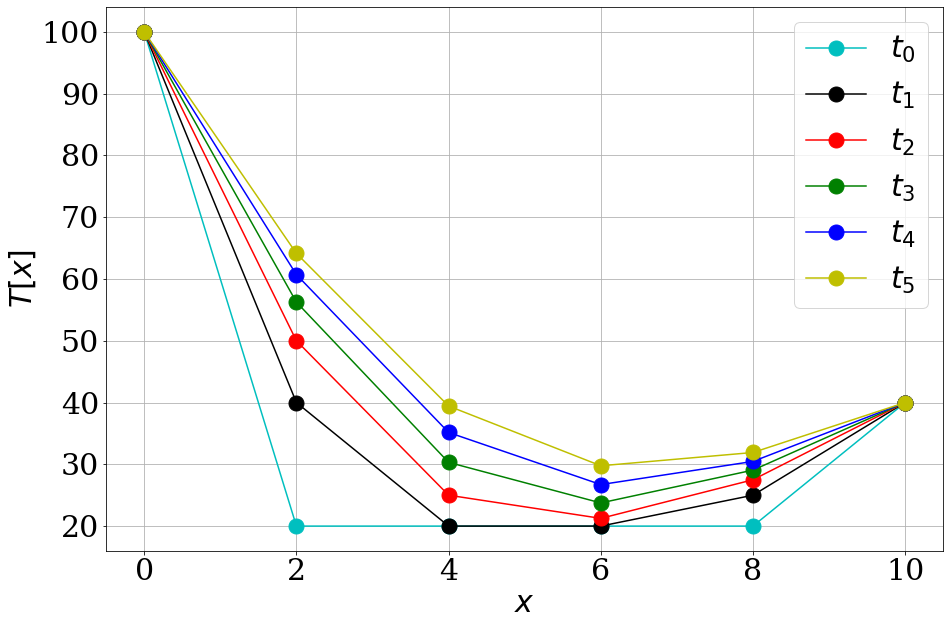

In [169]:
import numpy as np
import matplotlib.pyplot as plt

kappa=1
xa=0
xb=10
dx=2
dt=1
nt=5
xx=np.arange(xa,xb+dx,dx)
nx=np.size(xx)
#temperatur
t1=np.zeros(nx) #old time-step
t2=np.zeros(nx) #new time-step
#initial condition (internal nodes:1 sd 4)
t1[1:nx-1]=20
#boundary condition
t1[0]=100
t1[nx-1]=40
#
aa=np.zeros((nt+1,nx))
#simpan initial condition
aa[0,:]=t1

c=(dt*kappa)/(dx**2)
for time in range(1,nt+1): #iterate over time....
    for ii in range(1,nx-1): #internal nodes only (indeks 1 sd 4)
        t2[ii] = t1[ii] + c*(t1[ii-1]-2*t1[ii]+t1[ii+1])
    #BC
    t2[0]=100; t2[nx-1]=40
    aa[time,:]=t2
    #copy new values (t2) to old time-step (t1)
    t1=list(t2)

plt.rcParams["font.family"] = "serif"
plt.rcParams.update({"font.size": 30})
plt.subplots(figsize=(15,10))
plt.plot(xx,aa[0,:],'co-',markersize=15,label="$t_0$")
plt.plot(xx,aa[1,:],'ko-',markersize=15,label="$t_1$")
plt.plot(xx,aa[2,:],'ro-',markersize=15,label="$t_2$")
plt.plot(xx,aa[3,:],'go-',markersize=15,label="$t_3$")
plt.plot(xx,aa[4,:],'bo-',markersize=15,label="$t_4$")
plt.plot(xx,aa[5,:],'yo-',markersize=15,label="$t_5$")
plt.xlabel(r"$x$")
plt.ylabel(r"$T[x]$")
plt.grid()
plt.legend()
plt.savefig("PDE_parabolik2.png",bbox_inches='tight')


## Metode Implisit

Jika,
\begin{equation}
\alpha=\frac{\kappa dt}{dx^2},
\end{equation}
maka, distribusi suhu $T$ pada time-step $t_1$ dihitung dengan mencari solusi atas persamaan matriks berikut:
\begin{equation}
\begin{bmatrix}
(1+2\alpha)&-\alpha&&\\
-\alpha&(1+2\alpha)&-\alpha&\\
&-\alpha&(1+2\alpha)&-\alpha\\
&&-\alpha&(1+2\alpha)&
%&&&&-2\alpha&(1+2\alpha)
\end{bmatrix}\begin{pmatrix}
T_1^1\\
T_2^1\\
T_3^1\\
T_4^1
\end{pmatrix}=\begin{pmatrix}
T_1^0+\alpha T_0^0\\
T_2^0\\
T_3^0\\
T_4^0+\alpha T_5^0
%T_5^0+2\alpha\cdot dx\cdot f(t)
\end{pmatrix}
\end{equation}

Distribusi suhu pada time-step $t_2$ adalah sebagai berikut,
\begin{equation}
\begin{bmatrix}
(1+2\alpha)&-\alpha&&\\
-\alpha&(1+2\alpha)&-\alpha&\\
&-\alpha&(1+2\alpha)&-\alpha\\
&&-\alpha&(1+2\alpha)&
%&&&&-2\alpha&(1+2\alpha)
\end{bmatrix}\begin{pmatrix}
T_1^2\\
T_2^2\\
T_3^2\\
T_4^2
\end{pmatrix}=\begin{pmatrix}
T_1^1+\alpha T_0^1\\
T_2^1\\
T_3^1\\
T_4^1+\alpha T_5^1
%T_5^1+2\alpha\cdot dx\cdot f(t)
\end{pmatrix}\end{equation}

Dst.....gunakan pola yang sama!

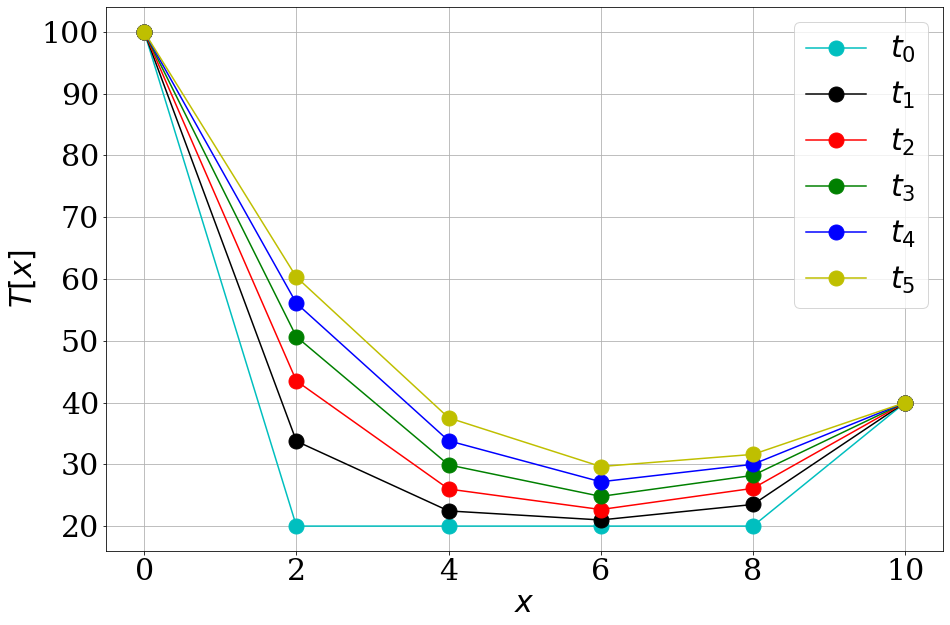

In [170]:
#implicit method
ta=100
tb=40
t1=np.zeros(nx-2)
t2=np.zeros(nx-2)
mm=np.zeros((nx-2,nx-2))
for ii in range(nx-2):
    mm[ii][ii]=1+2*c
for ii in range(nx-3):
    mm[ii][ii+1]=-c
    mm[ii+1][ii]=-c
#initial condition
t1[:]=20
#simpan nilai hasil perhitungan pada aa
aa=np.zeros((nt+1,nx))
aa[:,0]=ta
aa[:,nx-1]=tb

for ii in range(1,nx-1):
    aa[0,ii]=t1[ii-1]
#aa[0,1:nx-1]=t1[0:3]
#BC
t1[0] += c*ta
t1[nx-3] += c*tb
minv=np.linalg.inv(mm)
for time in range(1,nt+1):
    t2=np.dot(minv,t1)
    t1=list(t2)
    #simpan hasil perhitungan
    for ii in range(1,nx-1):
        aa[time,ii]=t1[ii-1]
    t1[0] += c*ta
    t1[nx-3] += c*tb

plt.subplots(figsize=(15,10))
plt.plot(xx,aa[0,:],'co-',markersize=15,label="$t_0$")
plt.plot(xx,aa[1,:],'ko-',markersize=15,label="$t_1$")
plt.plot(xx,aa[2,:],'ro-',markersize=15,label="$t_2$")
plt.plot(xx,aa[3,:],'go-',markersize=15,label="$t_3$")
plt.plot(xx,aa[4,:],'bo-',markersize=15,label="$t_4$")
plt.plot(xx,aa[5,:],'yo-',markersize=15,label="$t_5$")
plt.xlabel(r"$x$")
plt.ylabel(r"$T[x]$")
plt.grid()
plt.legend()
plt.savefig("PDE_parabolik3.png",bbox_inches='tight')

# Latihan-1
Write a computer code to solve 1D heat equation on the interval $0\le x \le 10$, with initial conditions $u(x,0)=\sin(\pi x/10)$ and boundary conditions $u(0,t)=u(10,t)=0$. Use a range of $\Delta x$ and $\Delta t$ values, and compare your results with the exact solution,
\begin{equation}
u(x,t)=exp\left(\frac{\kappa\pi^2t}{100}\right)\sin\left(\frac{\pi x}{100}\right)
\end{equation}
Use $\kappa=1$

# Latihan-2
Hitung distribusi panas sepanjang benda 1D pada interval $0\le x \le 10$ dengan syarat batas $u(0,t)=100$ dan $\frac{\partial T}{\partial x}(10,t)=0$ serta initial condition $u(x,0)=0$, sepnjang waktu dari $t=0$ sd $t=100$